# Working with OpenCV remap function

Date: 2024/01/08

Reference: https://stackoverflow.com/questions/46520123/how-do-i-use-opencvs-remap-function

```
----0----P------------------------W----> X axis

    +----+------------------------+
     \   |                   .
      \  D              .
       \ |         .
        \|    .
         X
```

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

P = 2  # 2m
D = 3  # 2m
W = 10

# fx returns D/ sqrt(D**2 + P**2) at x = 0
# fx returns 1 at x = P
# fx returns D / sqrt(D**2 + (W-P)**2) at x = W

fx = lambda x: D / math.sqrt(D**2 + (x-P)**2)

In [2]:
for x in range(0, 10, 1):
    print(fx(x))

0.8320502943378437
0.9486832980505138
1.0
0.9486832980505138
0.8320502943378437
0.7071067811865476
0.6
0.5144957554275265
0.4472135954999579
0.39391929857916763


In [3]:
new_x = [0]
x_accum = 0
for x in range(0, 10, 1):
    x_accum += fx(x)
    new_x.append(x_accum)

new_x

[0,
 0.8320502943378437,
 1.7807335923883576,
 2.7807335923883576,
 3.7294168904388716,
 4.561467184776715,
 5.268573965963263,
 5.868573965963263,
 6.38306972139079,
 6.830283316890748,
 7.224202615469916]

In [4]:
new_x = np.array(new_x)
new_x = new_x * W / new_x[-1]

<StemContainer object of 3 artists>

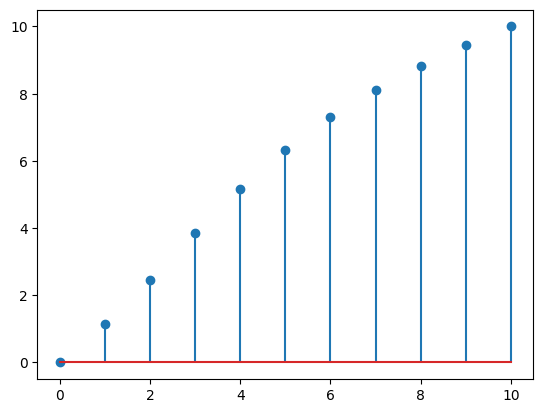

In [5]:
plt.stem(new_x)

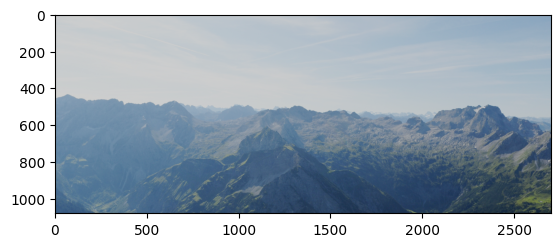

In [6]:
img = cv2.imread('images/Camera1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
img.shape

(1080, 2700, 3)

In [8]:
X_SCALE = img.shape[1]/W
X_SCALE

270.0

In [9]:
new_x = [0]
x_accum = 0
for x in range(0, img.shape[1]-1, 1):
    x_accum += fx(x/X_SCALE)
    new_x.append(x_accum)
    
new_x = np.array(new_x)
#new_x = new_x * img.shape[1] / new_x[-1]
new_x = new_x.astype(np.uint16)
new_x

array([   0,    0,    1, ..., 1888, 1888, 1889], dtype=uint16)

In [10]:
ratio = img.shape[1] / new_x[-1]
new_x = new_x * ratio
new_x

array([0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
       2.69857067e+03, 2.69857067e+03, 2.70000000e+03])

In [11]:
len(new_x)

2700

In [12]:
map_x = np.zeros(img.shape[:2])
map_y = np.zeros(img.shape[:2])
map_x.shape

(1080, 2700)

In [13]:
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        map_x[y, x] = new_x[x]

map_x

array([[0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.42932769e+00, ...,
        2.69857067e+03, 2.69857067e+03, 2.70000000e+03]])

In [14]:
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        map_y[y, x] = y

map_y

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       ...,
       [1.077e+03, 1.077e+03, 1.077e+03, ..., 1.077e+03, 1.077e+03,
        1.077e+03],
       [1.078e+03, 1.078e+03, 1.078e+03, ..., 1.078e+03, 1.078e+03,
        1.078e+03],
       [1.079e+03, 1.079e+03, 1.079e+03, ..., 1.079e+03, 1.079e+03,
        1.079e+03]])

In [15]:
mapped_img = cv2.remap(img, map_x.astype(np.float32), map_y.astype(np.float32), cv2.INTER_LINEAR)

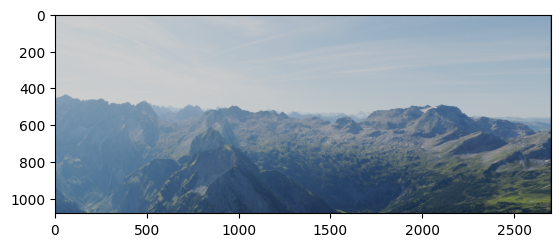

In [27]:
plt.imshow(mapped_img)

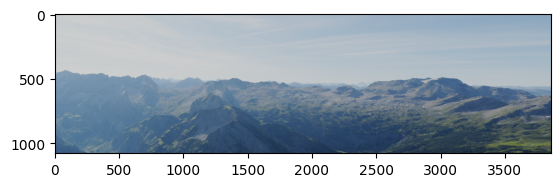

In [35]:
plt.imshow(cv2.resize(mapped_img, (int(img.shape[1] * ratio), img.shape[0])))

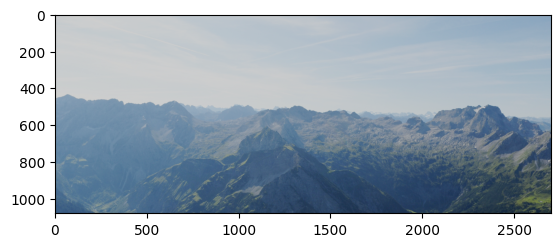

In [17]:
plt.imshow(img)